# MICROSOFT’S NEW MOVIE STUDIOS PROJECT: Analysis of Information from Box Office Metrics

## 1. OVERVIEW
### a) Introduction.

Microsoft was founded in 1975 by Bill Gates and Paul Allen in Redmond, Washington, USA. It has since become one of the world's largest and most influential technology companies. It has undergone several strategic shifts over the years, evolving from a software company to a diversified technology and cloud computing giant.

Microsoft's foray into the entertainment industry represents a strategic expansion beyond its traditional technology offerings. It a new venture under the Microsoft Corporation umbrella, aimed at entering the highly competitive and dynamic film industry. A subsidiary of Microsoft Corporation, Microsoft Movie Studios, is prepared to enter the film business with a strategic strategy that will make use of its technology resources and skills. This business case describes the justification, goals, and important factors for the founding and expansion of Microsoft Movie Studios in the fiercely competitive filmmaking industry. 
evolving market. 

### b) Business understanding 

Microsoft's interest in creating a movie studio reflects its desire to diversify revenue streams and leverage its brand recognition to compete in the entertainment sector. Understanding Microsoft's broader business context will be essential for tailoring your recommendations to align with the company's overall objectives and ensuring the success of the new movie studio within the larger Microsoft ecosystem.

Creating a successful movie studio requires a deep understanding of current industry trends and audience preferences. To help Microsoft's new movie studio make informed decisions about the types of films to produce, here are some insights into what's performing well at the box office. The studio aims to create compelling and entertaining content that resonates with audiences worldwide.

Microsoft's new movie studio lacks domain expertise in filmmaking and needs guidance on which film genres to focus on to maximize box office success. Leveraging historical box office data and exploring genre trends, this investigation will guide the choice of films they should produce. Box office revenues, ROI and ratings data will serve as indicators of financial viability and audience reception across different film genres.


The success of our analysis will be measured by the following metrics:

1. Our analysis should accurately identify the film genres that have historically performed well at the box office.
2. Revenue increase: We try to predict the profitability of a movie based on the features of the dataset. A movie is profitable if it makes more than at least 2.5x the budget.

### c) Main objectives and understaning the context 
Main Objective of the Study:
The main objective of this study is to analyze historical film data and identify features top movies share. Outcomes will determine the types of films to create, maximizing the chances of success.

Specific Objectives:
1. To determine the genres with the highest potential for success in the market in terms of revenue and audience reception.

2. To investigate additional factors such as budget, studio, and target audience demographics, to determine their impact on a film's success. 

3. Based on the analysis, derive actionable insights and recommendations that align the studio's content strategy with audience preferences and market trends to increase the probability of producing commercially successful films.

### d) Experimental Design
- Data Collection
- Read and check the data
- Cleaning the data, type casting
- Exploratory Data Analysis
- feature modelling and evaluation
- draw conclusion based on evaluation

### e) Data understanding. 
The dataset comprises historical data from Imdb and box office with information on genre, title, budget, gross profits and other features we can analyse to find out more about performance of movies. 
According to imdb pro, a film has to make around double its cost to break even. Distributions receive money known as rentals that is nearly 50% of gross earning. Some movies spend more on advertising but this is covered by ancilliary streaming and tv revenue whose data we do not have access to. A film of 100m budget needs to make at least 255m to break even. https://pro.imdb.com/content/article/entertainment-industry-resources/featured-articles/how-is-the-success-of-films-and-tv-shows-measured/GLFTC8ZLBBUSNTM3

## 2. Reading the Data

In [1]:
# importing libraries. 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
from collections import Counter
import ast
from fuzzywuzzy import fuzz, process

%matplotlib inline 

In [2]:
# Read the CSV files

tmdb_movies_df = pd.read_csv('data/tmdb_movies.csv')
tn_movie_budgets_df = pd.read_csv('data/tn_movie_budgets.csv', index_col=0 )
bom_movie_gross_df = pd.read_csv('data/bom_movie_gross.csv')

### 3. Checking the data 

Inspect the contents of the dataframe df.info 

In [3]:
# inspect first 5 records in the df
tmdb_movies_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [4]:
# Looks like our import added an extra index column, we will have to drop the column and modify our df before we can proceed. 
tmdb_movies_df.drop(tmdb_movies_df.columns[0], axis= 1, inplace= True)

# Inspect our changes 
tmdb_movies_df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [5]:
tmdb_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 1.8+ MB


In [6]:
tmdb_movies_df.shape

(26517, 9)

From our range index, there are 26517 rows in the `tmdb_movies.csv` dataframe.
There are 8 columns in the `tmdb_movies` dataframe.
Non-Null Count is the number of non-null values present in the column. All columns have 26,517 non-null values, indicating that there are no missing values in any of the columns.

Dtype refers to the data type of the values stored in the column. The DataFrame contains columns of three different data types:

- `int64`: Columns `id` and `vote_count` are of integer type.
- `object`: Columns `original_language`, `original_title`, `release_date`, and `title` are of object type, which typically represents string values.
- `float64`: Columns `popularity` and `vote_average` are of floating-point type.


Comparing the `vote_average(rating)` with `popularity`

Minimum Rating: 0.0
Maximum Rating: 10.0
The mean value of the ratings column is 5.991, median value is 6.0.    
The standard deviation is 1.853.


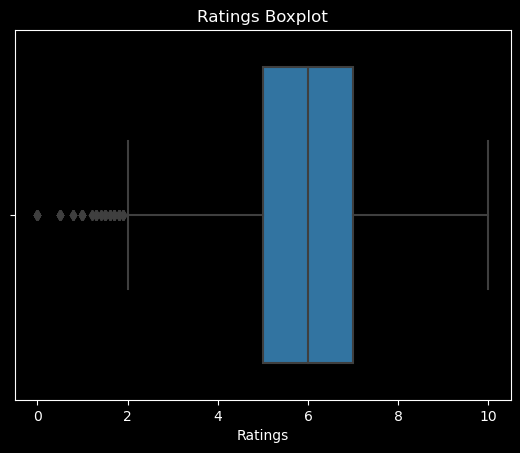

In [7]:
ratings_tmdb = tmdb_movies_df['vote_average']

# Calculate the minimum and maximum values
min_rating = ratings_tmdb.min()
max_rating = ratings_tmdb.max()

# Print the range of values
print("Minimum Rating:", min_rating)
print("Maximum Rating:", max_rating)


# aggregation functions. 
print(f'The mean value of the ratings column is {ratings_tmdb.mean():.3f}, median value is {ratings_tmdb.median()}.\
    \nThe standard deviation is {ratings_tmdb.std():.3f}.')

# Select the column for the boxplot
column_data = tmdb_movies_df['vote_average']

# Create the boxplot using Seaborn
sns.boxplot(x=column_data, color='tab:blue')

# Set the title and labels
plt.title('Ratings Boxplot')
plt.xlabel('Ratings')


plt.show();


On average, movies in the `tmdb_movies.csv` dataset have received a rating of 6.0, and approximately 50% of the movies have a rating below 6.0, as indicated by the median.

The standard deviation of 1.853 measures dispersion. A larger value indicates greater spread, while smaller values indicate that data points are clustered around the mean.

The ratings range from 0 to 10. With a standard deviation of 1.853, the ratings exhibit some variability but are not extremely spread out. According to the boxplot, ratings below 2 can be considered as outliers. Since our interest lies in movies that perform well, we will drop rows with low ratings.


In [8]:
# Filter the DataFrame to keep rows where rating is greater than 2
tmdb_movies_df = tmdb_movies_df[tmdb_movies_df['vote_average'] >= 2]

Minimum Popularity: 0.6
Maximum Popularity: 80.773


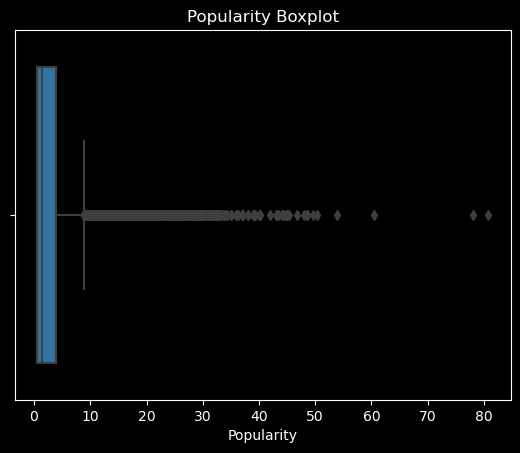

In [9]:
# Extract and anlyse popularity from tmdb
popularity_tmdb = tmdb_movies_df['popularity']

# Calculate the minimum and maximum values
min_popularity= popularity_tmdb.min()
max_popularity= popularity_tmdb.max()

# Print the range of values
print("Minimum Popularity:", min_popularity)
print("Maximum Popularity:", max_popularity)

# Select the column for the boxplot
column_data = tmdb_movies_df['popularity']

# Create the boxplot using Seaborn
sns.boxplot(x=column_data, color='tab:blue')

# Set the title and labels
plt.title('Popularity Boxplot')
plt.xlabel('Popularity')

# Display the plot
plt.show()


Unlike the `vote_average` data, the column `popularity` does not have symmetric data. The box plot exhibits a negative skew, with the bulk of the data we want to analyse concentrated towards the right side. The median, Q1 (first quartile), and Q3 (third quartile) are all on the left side of the plot.

In [10]:
# Filter the DataFrame to get movies with popularity rating > 70
popular_movies = tmdb_movies_df[tmdb_movies_df['popularity'] > 40]

# Get the count of movies with popularity rating > 40
num_popular_movies = len(popular_movies)

# Print the result
print("Number of movies with popularity vote > 40:", num_popular_movies)

Number of movies with popularity vote > 40: 23


Very few movies in the CSV had a popularity vote greater than 40. Since we want to analyze movies that are representative of the industry, we will drop rows with low popularity.

The rating of a movie (`vote_average`) is influenced by the vote count. Before deciding how to deal with movies with low vote count, we will investigate the distribution of votes.

In [11]:
# keep rows where popularity is greater than or equal to 10
tmdb_movies_df = tmdb_movies_df[tmdb_movies_df['popularity'] >= 10]

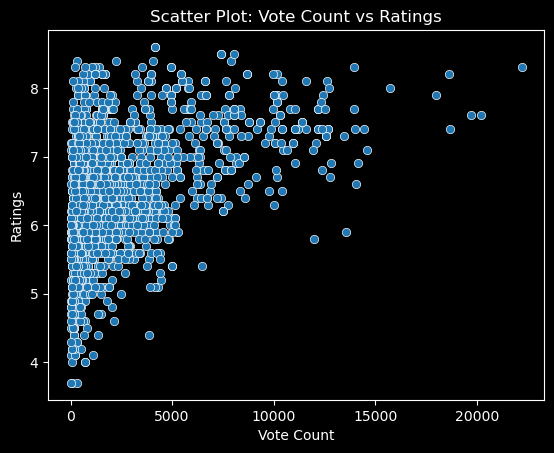

In [12]:
# we compare vote_count and rating

vote_count_data = tmdb_movies_df['vote_count']
ratings_data = tmdb_movies_df['vote_average']

# Create the scatter plot using Seaborn
sns.scatterplot(x=vote_count_data, y=ratings_data, color='tab:blue')

# Set the title and labels
plt.title('Scatter Plot: Vote Count vs Ratings')
plt.xlabel('Vote Count')
plt.ylabel('Ratings')

# Display the plot
plt.show()


It is essential to interpret ratings and vote counts within the appropriate context. A low vote count, despite yielding a higher average rating, may not accurately reflect the opinions of the general public. Instead, it suggests that the movie in question has found success within a smaller, dedicated group of viewers who appreciate its distinct qualities.

In [13]:

# Define the percentile threshold
percentile_threshold = 75  # Keep movies with vote counts above the 75th percentile

# Calculate the vote count threshold based on the specified percentile
vote_count_threshold = tmdb_movies_df['vote_count'].quantile(percentile_threshold / 100)

# Filter the DataFrame based on the vote count threshold
tmdb_movies_df = tmdb_movies_df[tmdb_movies_df['vote_count'] >= vote_count_threshold]

tmdb_movies_df.shape


(421, 9)

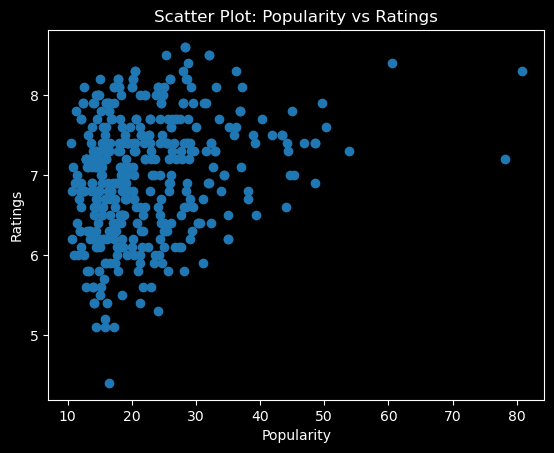

In [14]:
# Select the columns for the scatter plot
popularity_data = tmdb_movies_df['popularity']
ratings_data = tmdb_movies_df['vote_average']

# Create the scatter plot
plt.scatter(popularity_data, ratings_data, color='tab:blue')

# Set the title and labels
plt.title('Scatter Plot: Popularity vs Ratings')
plt.xlabel('Popularity')
plt.ylabel('Ratings')

# Display the plot
plt.show()


{28: 190, 12: 165, 18: 156, 878: 125, 53: 110, 35: 98, 14: 89, 10751: 63, 80: 50, 16: 48, 10749: 46, 9648: 39, 27: 27, 36: 14, 10752: 12, 37: 8, 10402: 5}


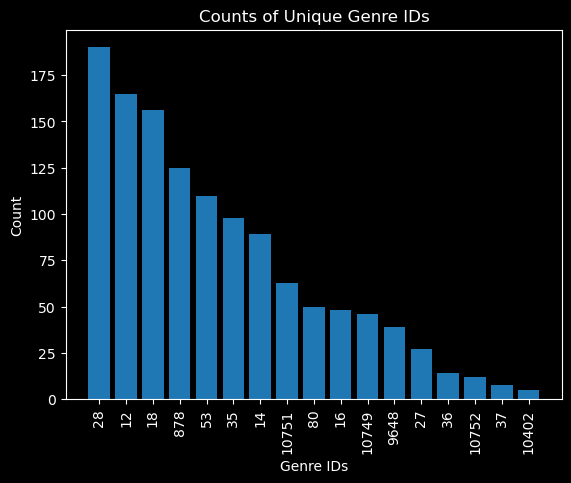

In [15]:
# Convert string representations of lists to actual lists
tmdb_movies_df['genre_ids'] = tmdb_movies_df['genre_ids'].apply(lambda x: ast.literal_eval(x))

# Flatten the lists in the 'genre_ids' column
flattened_lists = tmdb_movies_df['genre_ids'].explode().tolist()

# Count the occurrences of each item
genre_counts = dict(Counter(flattened_lists))

# Sort the dictionary by values in descending order
genre_counts = dict(sorted(genre_counts.items(), key=lambda x: x[1], reverse=True))

# Display the dictionary
print(genre_counts)

# Extract the genre IDs and counts as separate lists
genres = list(map(str, genre_counts.keys()))
counts = list(genre_counts.values())

# Create a bar plot
plt.bar(genres, counts, color='tab:blue')
plt.xlabel('Genre IDs')
plt.ylabel('Count')
plt.title('Counts of Unique Genre IDs')
plt.xticks(rotation=90)
plt.show()


Analyze the distribution of genres among successful movies to determine which genres are more prevalent in highly rated and popular movies.

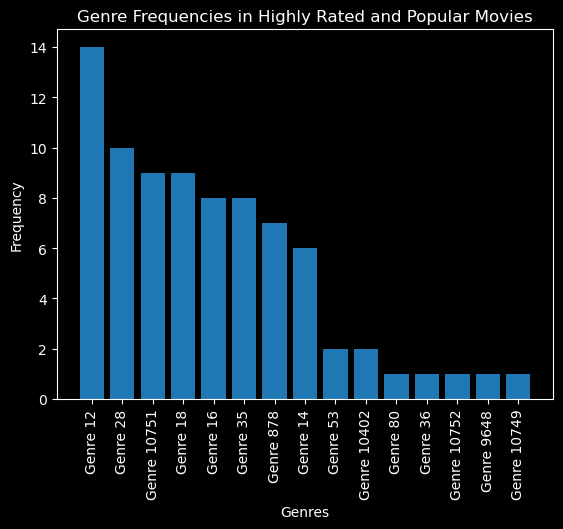

In [16]:
# Filter movies rated over 7.5
filtered_df = tmdb_movies_df[tmdb_movies_df['vote_average'] > 7.5]

# Calculate the 75th percentile of popularity
popularity_threshold = filtered_df['popularity'].quantile(0.75)

# Filter movies with popularity above the 75th percentile
filtered_df = filtered_df[filtered_df['popularity'] > popularity_threshold]

# Explode 'genre_ids' and count occurrences of each genre
genre_counts = filtered_df['genre_ids'].explode().value_counts()

# Get the genre labels as strings
genre_labels = ['Genre ' + str(genre_id) for genre_id in genre_counts.index]

# Plot the bar chart
plt.bar(genre_labels, genre_counts.values, color='tab:blue')
plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.title('Genre Frequencies in Highly Rated and Popular Movies')
plt.xticks(rotation=90)
plt.show()


Investigate the distribution of languages in successful movies. Determine if movies in specific languages are more likely to achieve higher ratings and popularity.

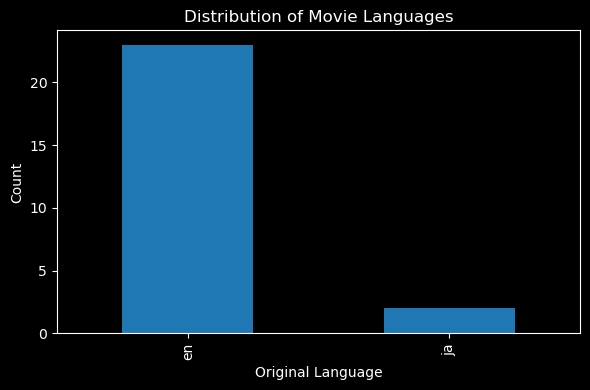

In [17]:
# Count the occurrences of each language
language_counts = filtered_df['original_language'].value_counts()

plt.figure(figsize=(6, 4))
language_counts.plot(kind='bar', color='tab:blue')
plt.xlabel('Original Language')
plt.ylabel('Count')
plt.title('Distribution of Movie Languages')
plt.tight_layout()
plt.show()


Checking popularity by genre_id.

In [18]:
# Create a new column in the filtered_df DataFrame to store the count of genre IDs
filtered_df['genre_count'] = filtered_df['genre_ids'].apply(lambda x: sum(1 for genre_id in x if genre_id in genre_counts.index))

# Sort the DataFrame based on the genre_count column in descending order
sorted_df = filtered_df.sort_values('genre_count', ascending=False)

# Reset the index of the sorted DataFrame
sorted_df = sorted_df.reset_index(drop=True)

# Create a new DataFrame with only the desired columns
new_df = sorted_df.loc[:, ['genre_ids', 'id', 'title', 'original_language', 'vote_average']]

# Print the new DataFrame
print(new_df.head())


                 genre_ids      id                              title  \
0  [12, 10751, 16, 28, 35]  177572                         Big Hero 6   
1    [28, 12, 16, 878, 35]  324857  Spider-Man: Into the Spider-Verse   
2  [12, 10751, 16, 28, 35]  177572                         Big Hero 6   
3      [14, 12, 16, 10751]   10191           How to Train Your Dragon   
4      [28, 12, 16, 10751]  260513                      Incredibles 2   

  original_language  vote_average  
0                en           7.8  
1                en           8.4  
2                en           7.8  
3                en           7.7  
4                en           7.6  


Q. What do these top 5 movies filtered above have in common? 
- They are all animated movies.

### Checking the data 

In [19]:
bom_movie_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [20]:
bom_movie_gross_df.shape

(3387, 5)

- The `bom_movie_gross_df` dataset contains 5 columns: 'title', 'studio', 'domestic_gross', 'foreign_gross', and 'year'.
- The dataset has a total of 3387 rows, with a RangeIndex of 3387 entries.
- The 'title', 'studio', and 'foreign_gross' columns are of object data type, which typically represents strings.
- The 'domestic_gross' column is of float64 data type, and the 'year' column is of int64 data type.
- There are missing values present in the 'studio', 'domestic_gross', and 'foreign_gross' columns. The 'foreign_gross' column has a relatively higher number of missing values compared to the other columns.

In [21]:
bom_movie_gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


Additionally, we can anticipate performing data cleaning and transformation tasks, such as handling missing values and converting the 'foreign_gross' column to a numeric data type.

In [22]:
# Identify the columns with missing values
columns_w_na = ['studio', 'domestic_gross', 'foreign_gross']

# Calculate the percentage of missing values
percentage_missing = bom_movie_gross_df[columns_w_na].isnull().mean() * 100

# Print the percentage of missing values by column
for column in percentage_missing.index:
    print("Percentage of missing values in column '{}': {:.2f}%".format(column, percentage_missing[column]))


Percentage of missing values in column 'studio': 0.15%
Percentage of missing values in column 'domestic_gross': 0.83%
Percentage of missing values in column 'foreign_gross': 39.86%


We drop rows with a small percentage of missing values. Then, we evaluate the missing values for the 'foreign_gross' column to determine how to handle them.

In [23]:
# Drop rows with missing values in 'studio' and 'domestic_gross' columns
bom_movie_gross_df.dropna(subset=['studio', 'domestic_gross'], inplace= True)

# check again 
# Identify the columns with missing values
columns_w_na = ['studio', 'domestic_gross', 'foreign_gross']

# Calculate the percentage of missing values
percentage_missing = bom_movie_gross_df[columns_w_na].isnull().mean() * 100

# Print the percentage of missing values by column
for column in percentage_missing.index:
    print("Percentage of missing values in column '{}': {:.2f}%".format(column, percentage_missing[column]))

Percentage of missing values in column 'studio': 0.00%
Percentage of missing values in column 'domestic_gross': 0.00%
Percentage of missing values in column 'foreign_gross': 40.20%


In [24]:
bom_movie_gross_df['foreign_gross'].head()

0    652000000
1    691300000
2    664300000
3    535700000
4    513900000
Name: foreign_gross, dtype: object

In [25]:
# Remove commas 
bom_movie_gross_df['foreign_gross'] = bom_movie_gross_df['foreign_gross'].str.replace(',', '')

# Convert
bom_movie_gross_df['foreign_gross'] = bom_movie_gross_df['foreign_gross'].astype(float)

# Verify
print(bom_movie_gross_df.dtypes)



title              object
studio             object
domestic_gross    float64
foreign_gross     float64
year                int64
dtype: object


Percentage of missing values in column 'foreign_gross': 40.20% 
Let us see how to deal with this. 

In [26]:
columns= ['domestic_gross', 'foreign_gross']
bom_movie_gross_df[columns].describe()

,domestic_gross,foreign_gross
count,3.356000e+03,2.007000e+03
mean,2.877149e+07,7.579038e+07
std,6.700694e+07,1.381796e+08
min,1.000000e+02,6.000000e+02
25%,1.200000e+05,3.900000e+06
50%,1.400000e+06,1.940000e+07
75%,2.795000e+07,7.595000e+07
max,9.367000e+08,9.605000e+08


A very large number of missing values in this column makes it difficult to impute values. Not all values in the dataset are required since we will only be taking
data for elements that match our new_df we created previously. Opt to drop rows instead.

In [27]:
bom_movie_gross_df.dropna(subset=['foreign_gross'], inplace= True)
bom_movie_gross_df[columns].describe()

,domestic_gross,foreign_gross
count,2.007000e+03,2.007000e+03
mean,4.701984e+07,7.579038e+07
std,8.162689e+07,1.381796e+08
min,4.000000e+02,6.000000e+02
25%,6.700000e+05,3.900000e+06
50%,1.670000e+07,1.940000e+07
75%,5.605000e+07,7.595000e+07
max,9.367000e+08,9.605000e+08


- The count of the dataset is 2007, indicating that there are no missing values in these columns.
- The mean 'domestic_gross' is approximately $47,019,840, while the mean 'foreign_gross' is approximately $75,790,380. These values represent the average gross earnings of the movies in the dataset.
- The standard deviation of 'domestic_gross' is approximately $81,626,890, and the standard deviation of 'foreign_gross' is approximately $138,179,600. A higher standard deviation indicates a greater spread of data points.
- 25% of the movies have domestic and foreign gross earnings lower than approximately $670,000 and $3,900,000, respectively. We will drop rows with gross earnings lower than 50%.


In [28]:
# 25th percentile
domestic_threshold = bom_movie_gross_df['domestic_gross'].quantile(0.50)
foreign_threshold = bom_movie_gross_df['foreign_gross'].quantile(0.50)

# Drop rows where 'domestic_gross' or 'foreign_gross' is below the 25th percentile
bom_movie_gross_df = bom_movie_gross_df[(bom_movie_gross_df['domestic_gross'] >= domestic_threshold) & (bom_movie_gross_df['foreign_gross'] >= foreign_threshold)]
bom_movie_gross_df.shape


(800, 5)

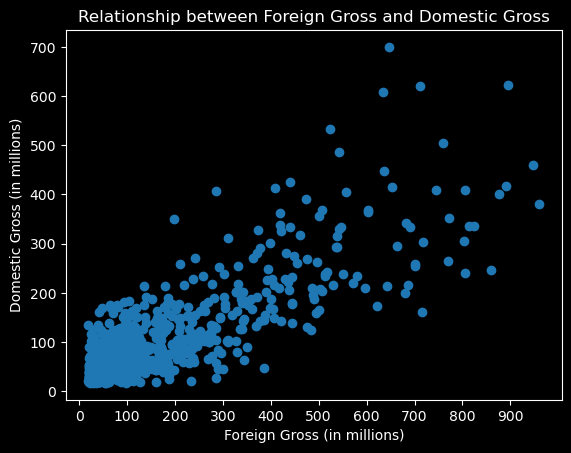

In [29]:
# Create a scatter plot
plt.scatter(bom_movie_gross_df['foreign_gross'], bom_movie_gross_df['domestic_gross'], color='tab:blue')
plt.xlabel('Foreign Gross (in millions)')
plt.ylabel('Domestic Gross (in millions)')
plt.title('Relationship between Foreign Gross and Domestic Gross')

# Set the tick values
x_ticks = range(0, int(max(bom_movie_gross_df['foreign_gross'])/1000000) + 1, 100)
y_ticks = range(0, int(max(bom_movie_gross_df['domestic_gross'])/1000000) + 1, 100)

# Convert tick values to millions
x_ticks_millions = [x * 1000000 for x in x_ticks]
y_ticks_millions = [y * 1000000 for y in y_ticks]

# Set the modified tick values
plt.xticks(x_ticks_millions, x_ticks)
plt.yticks(y_ticks_millions, y_ticks)

plt.show()



Except for outliers, the plot shows a positive correlation between domestic and foreign gross. Movies that perform well domestically are also likely to perform well internationally. We will sum the values for every row and add them to a new column 'total_gross'.

In [30]:
# Create a new column "total_gross"
bom_movie_gross_df['total_gross'] = bom_movie_gross_df.copy()['domestic_gross'] + bom_movie_gross_df['foreign_gross']

# Print the updated DataFrame
bom_movie_gross_df.head()


,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


Let us analyse the studio before trying to find its relationships with other features. 

In [31]:
# Count the number of unique studios
unique_studios = bom_movie_gross_df['studio'].nunique()

# Print the number of unique studios
print("Number of unique studios:", unique_studios)

# Calculate the count/frequency of each studio
studio_counts = bom_movie_gross_df['studio'].value_counts()

# Print the count/frequency of each studio
print("Movie count per studio:\n", studio_counts)

Number of unique studios: 35
Movie count per studio:
 Uni.           109
Fox            106
WB              99
BV              80
Sony            77
Par.            70
LGF             40
WB (NL)         37
LG/S            25
Focus           18
Wein.           17
SGem            17
FoxS            13
Rela.           12
STX             11
ORF             10
TriS             9
Sum.             8
P/DW             8
SPC              5
FD               5
W/Dim.           5
CBS              4
A24              3
PNT              2
BST              1
Annapurna        1
Studio 8         1
MGM              1
RAtt.            1
Neon             1
GrtIndia         1
EC               1
Mira.            1
Global Road      1
Name: studio, dtype: int64


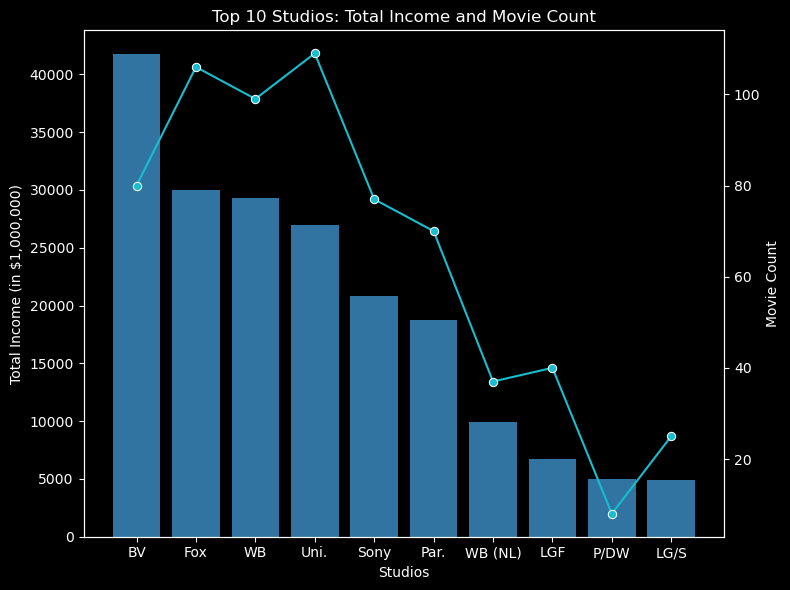

In [32]:
# Group the DataFrame by studio and calculate the sum of total_gross and count of movies for each studio
studio_summary = bom_movie_gross_df.groupby('studio').agg({'total_gross': 'sum', 'title': 'count'})

# Sort the studios in descending order based on total income and select the top 10
top_10_studios = studio_summary.nlargest(10, 'total_gross')

# Prepare the data for plotting
studios = top_10_studios.index
incomes = top_10_studios['total_gross'] / 1000000
movie_counts = top_10_studios['title']

# Create the figure and axes
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot the total income on the first axis
sns.barplot(x=studios, y=incomes, ax=ax1, color='tab:blue')
ax1.set_ylabel('Total Income (in $1,000,000)')
ax1.set_xlabel('Studios')

# Create the second axis for movie count
ax2 = ax1.twinx()
sns.lineplot(x=studios, y=movie_counts, ax=ax2, marker='o', color='tab:cyan')
ax2.set_ylabel('Movie Count')

# Set the title
plt.title('Top 10 Studios: Total Income and Movie Count')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


The chart shows a nearly positive relationship between studio, movie count and gross film sales. 

In [33]:
titles_to_inspect = ['Spider-Man: Into the Spider-Verse', 'Avengers: Infinity War', 'Spirited Away', 'Logan',
                     'Spirited Away', 'Harry Potter and the Deathly Hallows: Part 1', 'The Avengers',
                     'The Lion King', 'Harry Potter and the Deathly Hallows: Part 2', 'Whiplash',
                     "To All the Boys I've Loved Before"]


# Iterate over the titles and find fuzzy matches in the bom_movie_gross_df DataFrame
for title in titles_to_inspect:
    fuzzy_matches = process.extract(title, bom_movie_gross_df['title'], limit=5)
    
    # Display the fuzzy matches and their corresponding indices
    print("Fuzzy matches for title '{}':".format(title))
    for match, score, index in fuzzy_matches:
        print("- Match: '{}' (Score: {}), Index: {}".format(match, score, index))
    print()


Fuzzy matches for title 'Spider-Man: Into the Spider-Verse':
- Match: 'Spider-Man: Into The Spider-Verse' (Score: 100), Index: 3102
- Match: 'Iron Man 2' (Score: 86), Index: 6
- Match: 'The Chronicles of Narnia: The Voyage of the Dawn Treader' (Score: 86), Index: 11
- Match: 'The King's Speech' (Score: 86), Index: 12
- Match: 'The Karate Kid' (Score: 86), Index: 14

Fuzzy matches for title 'Avengers: Infinity War':
- Match: 'War Horse' (Score: 86), Index: 366
- Match: 'This Means War' (Score: 86), Index: 775
- Match: 'World War Z' (Score: 86), Index: 1138
- Match: 'War Dogs' (Score: 86), Index: 2407
- Match: 'Sing' (Score: 64), Index: 2334

Fuzzy matches for title 'Spirited Away':
- Match: 'Ted' (Score: 90), Index: 738
- Match: 'It' (Score: 90), Index: 2770
- Match: 'Ted 2' (Score: 72), Index: 1907
- Match: 'Red' (Score: 60), Index: 38
- Match: 'Rio' (Score: 60), Index: 340

Fuzzy matches for title 'Logan':
- Match: 'Logan (2017)' (Score: 90), Index: 2772
- Match: 'Logan Lucky' (Score:

In [34]:
title_mapping = {
    "Spider-Man: Into The Spider-Verse": "Spider-Man: Into the Spider-Verse",
    "Logan (2017)": "Logan",
    "Harry Potter and the Deathly Hallows Part 2": "Harry Potter and the Deathly Hallows: Part 2",
    "The Lion King (in 3D)": "The Lion King",
    "The Avengers": "Marvel's The Avengers",
    "Harry Potter and the Deathly Hallows Part 1": "Harry Potter and the Deathly Hallows: Part 1"
}

# Create a copy of the DataFrame
bom_movie_gross_df = bom_movie_gross_df.copy()

bom_movie_gross_df.loc[:, 'title'] = bom_movie_gross_df['title'].replace(title_mapping)

In [35]:
new_df.head()

,genre_ids,id,title,original_language,vote_average
0,"[12, 10751, 16, 28, 35]",177572,Big Hero 6,en,7.8
1,"[28, 12, 16, 878, 35]",324857,Spider-Man: Into the Spider-Verse,en,8.4
2,"[12, 10751, 16, 28, 35]",177572,Big Hero 6,en,7.8
3,"[14, 12, 16, 10751]",10191,How to Train Your Dragon,en,7.7
4,"[28, 12, 16, 10751]",260513,Incredibles 2,en,7.6


In [36]:
# Merge the two datasets based on the movie titles
merged_df = new_df.merge(bom_movie_gross_df[['title', 'studio', 'total_gross']], on='title', how='left')

# Create the new DataFrame with desired columns
final_df = merged_df[['title', 'studio', 'total_gross', 'genre_ids', 'id', 'original_language', 'vote_average']]

# Display the new DataFrame
final_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              25 non-null     object 
 1   studio             19 non-null     object 
 2   total_gross        19 non-null     float64
 3   genre_ids          25 non-null     object 
 4   id                 25 non-null     int64  
 5   original_language  25 non-null     object 
 6   vote_average       25 non-null     float64
dtypes: float64(2), int64(1), object(4)
memory usage: 1.6+ KB


In [37]:
# Extract the rows with null values in the DataFrame
null_rows = final_df[final_df.isnull().any(axis=1)]

# Display the rows with null values
print(null_rows)


                                title studio  total_gross        genre_ids  \
7              Avengers: Infinity War    NaN          NaN     [12, 28, 14]   
8                       Spirited Away    NaN          NaN  [16, 10751, 14]   
11                      Spirited Away    NaN          NaN  [16, 10751, 14]   
17                       The Avengers    NaN          NaN    [878, 28, 12]   
20                           Whiplash    NaN          NaN      [18, 10402]   
23  To All the Boys I've Loved Before    NaN          NaN      [35, 10749]   

        id original_language  vote_average  
7   299536                en           8.3  
8      129                ja           8.5  
11     129                ja           8.5  
17   24428                en           7.6  
20  244786                en           8.4  
23  466282                en           7.9  


In [38]:
final_df = final_df.dropna(axis=0)

## Checking the Data

In [39]:
tn_movie_budgets_df.head()


,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In this dataset, we focus on production_budget and how it relates to other features. 

In [40]:
tn_movie_budgets_df['production_budget'].head()

id
1    $425,000,000
2    $410,600,000
3    $350,000,000
4    $330,600,000
5    $317,000,000
Name: production_budget, dtype: object

In [41]:
# Remove non-numeric characters and convert to numeric data type
tn_movie_budgets_df['production_budget'] = tn_movie_budgets_df['production_budget'].str.replace(r'[^0-9]', '', regex=True).astype(float)

tn_movie_budgets_df['production_budget'].head()


id
1    425000000.0
2    410600000.0
3    350000000.0
4    330600000.0
5    317000000.0
Name: production_budget, dtype: float64

In [42]:
# Iterate over the titles and find fuzzy matches in the bom_movie_gross_df DataFrame
for movie in titles_to_inspect:
    fuzzy_matches = process.extract(movie, tn_movie_budgets_df['movie'], limit=5)
    
    # Display the fuzzy matches and their corresponding indices
    print("Fuzzy matches for title '{}':".format(movie))
    for match, score, index in fuzzy_matches:
        print("- Match: '{}' (Score: {}), Index: {}".format(match, score, index))
    print()


Fuzzy matches for title 'Spider-Man: Into the Spider-Verse':
- Match: 'Spider-Man: Into The Spider-Verse 3D' (Score: 96), Index: 44
- Match: 'Spider-Man' (Score: 90), Index: 19
- Match: 'Spider' (Score: 90), Index: 85
- Match: 'The Dark Knight Rises' (Score: 86), Index: 11
- Match: 'The Lone Ranger' (Score: 86), Index: 13

Fuzzy matches for title 'Avengers: Infinity War':
- Match: 'Avengers: Infinity War' (Score: 100), Index: 7
- Match: 'War' (Score: 90), Index: 46
- Match: 'The Avengers' (Score: 86), Index: 27
- Match: 'World War Z' (Score: 86), Index: 69
- Match: 'War Horse' (Score: 86), Index: 12

Fuzzy matches for title 'Spirited Away':
- Match: 'Ted' (Score: 90), Index: 84
- Match: 'It' (Score: 90), Index: 24
- Match: 'Pi' (Score: 90), Index: 7
- Match: 'Cirque du Soleil: Worlds Away' (Score: 86), Index: 77
- Match: 'Ted 2' (Score: 72), Index: 55

Fuzzy matches for title 'Logan':
- Match: 'Logan' (Score: 100), Index: 59
- Match: 'Logan Lucky' (Score: 90), Index: 21
- Match: 'Logan

In [43]:
title_mappings = {
    "Spider-Man: Into The Spider-Verse 3D": "Spider-Man: Into the Spider-Verse",
    "Logan": "Logan",
    "Harry Potter and the Deathly Hallows: Part II": "Harry Potter and the Deathly Hallows: Part 2",
    "The Lion King": "The Lion King",
    "The Avengers": "Marvel's The Avengers",
    "Harry Potter and the Deathly Hallows: Part I": "Harry Potter and the Deathly Hallows: Part 1"
}
# Create a copy of the DataFrame
tn_movie_budgets_df = tn_movie_budgets_df.copy()

tn_movie_budgets_df.loc[:, 'movie'] = tn_movie_budgets_df['movie'].replace(title_mappings)


In [44]:
# Merge the 'production_budget' column from tn_movie_budgets_df with final_df
merged_df = final_df.merge(tn_movie_budgets_df[['movie', 'production_budget']], left_on='title', right_on='movie', how='left')

# Display the merged DataFrame
merged_df.head()

,title,studio,total_gross,genre_ids,id,original_language,vote_average,movie,production_budget
0,Big Hero 6,BV,6.578000e+08,"[12, 10751, 16, 28, 35]",177572,en,7.8,Big Hero 6,165000000.0
1,Spider-Man: Into the Spider-Verse,Sony,3.755000e+08,"[28, 12, 16, 878, 35]",324857,en,8.4,Spider-Man: Into the Spider-Verse,90000000.0
2,Big Hero 6,BV,6.578000e+08,"[12, 10751, 16, 28, 35]",177572,en,7.8,Big Hero 6,165000000.0
3,How to Train Your Dragon,P/DW,4.949000e+08,"[14, 12, 16, 10751]",10191,en,7.7,How to Train Your Dragon,165000000.0
4,Incredibles 2,BV,1.242800e+09,"[28, 12, 16, 10751]",260513,en,7.6,Incredibles 2,200000000.0


In [45]:
# Extract the rows with null values in the DataFrame
nul_rows = merged_df[merged_df.isnull().any(axis=1)]

# Display the rows with null values
print(nul_rows)

                            title studio  total_gross          genre_ids  \
5  Guardians of the Galaxy Vol. 2     BV  863700000.0  [28, 12, 35, 878]   

       id original_language  vote_average movie  production_budget  
5  283995                en           7.7   NaN                NaN  


In [46]:
merged_df = merged_df.dropna(axis=0)
merged_df.head()

,title,studio,total_gross,genre_ids,id,original_language,vote_average,movie,production_budget
0,Big Hero 6,BV,6.578000e+08,"[12, 10751, 16, 28, 35]",177572,en,7.8,Big Hero 6,165000000.0
1,Spider-Man: Into the Spider-Verse,Sony,3.755000e+08,"[28, 12, 16, 878, 35]",324857,en,8.4,Spider-Man: Into the Spider-Verse,90000000.0
2,Big Hero 6,BV,6.578000e+08,"[12, 10751, 16, 28, 35]",177572,en,7.8,Big Hero 6,165000000.0
3,How to Train Your Dragon,P/DW,4.949000e+08,"[14, 12, 16, 10751]",10191,en,7.7,How to Train Your Dragon,165000000.0
4,Incredibles 2,BV,1.242800e+09,"[28, 12, 16, 10751]",260513,en,7.6,Incredibles 2,200000000.0


Now we remain with a smaller dataset, merged_df, consisting of most popular and highly rated films. We can analyse this df for insight on sales and performance of films.

In [47]:
# rental revenue 
merged_df.loc[:, 'rental_revenue'] = merged_df['total_gross'] * 0.5

# profit
merged_df.loc[:, 'profitability'] = merged_df['total_gross'] - (merged_df['rental_revenue'] + merged_df['production_budget'])

# Calculate correlation coefficient
correlation_total_gross = merged_df['profitability'].corr(merged_df['total_gross'])
correlation_production_budget = merged_df['profitability'].corr(merged_df['production_budget'])
correlation_vote_average = merged_df['profitability'].corr(merged_df['vote_average'])

print("Correlation with Total Gross:", correlation_total_gross)
print("Correlation with Production Budget:", correlation_production_budget)
print("Correlation with Rating:", correlation_vote_average)



Correlation with Total Gross: 0.9411707318400587
Correlation with Production Budget: 0.17197959487769787
Correlation with Rating: -0.23465650646855293


`Total_gross` and `Profitability`: There is a strong positive correlation of 0.941 between the total gross and profitability of movies. This indicates that as the total gross increases, the profitability tends to increase as well. This suggests that movies with higher box office earnings are more likely to be profitable.

`Production Budget` and `Profitability`: The correlation between production budget and profitability is relatively weak, with a value of 0.172. There is limited association between the production budget of a movie and its profitability. A higher production budget does not necessarily guarantee higher profitability. Other factors, such as marketing, distribution, and audience reception, may play significant roles in determining a movie's profitability.

`Rating` and `Profitability`: The correlation between the movie rating and profitability is negative, with a value of -0.235. This suggests that there is a weak inverse relationship between the rating of a movie and its profitability. 

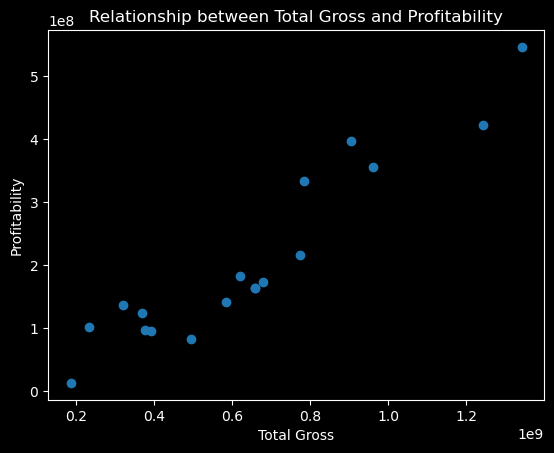

In [48]:

# Create a scatter plot
plt.scatter(merged_df['total_gross'], merged_df['profitability'], color='tab:blue')
plt.xlabel('Total Gross')
plt.ylabel('Profitability')
plt.title('Relationship between Total Gross and Profitability')
plt.show()


The plot confirms the positive relationship between profitability and total gross from a dataset of high performing movies. It's important to remember that correlation does not imply causation, and many other factors can influence a movie's profitability, including marketing efforts, competition, release timing, and audience demographics. Here is a look at profitability by genre for our top movies.

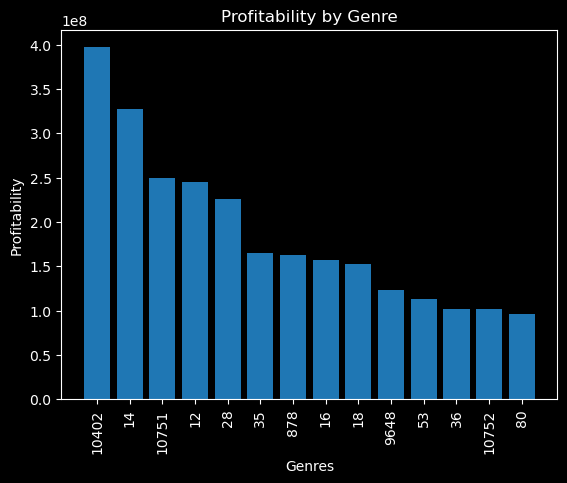

In [49]:
# Flatten the genre_ids column
flattened_genres = merged_df.explode('genre_ids')

# Calculate profitability by genre
profitability_by_genre = flattened_genres.groupby('genre_ids')['profitability'].mean()

# Sort the profitability by genre in descending order
profitability_by_genre = profitability_by_genre.sort_values(ascending=False)

# Plot the profitability by genre using a bar chart
plt.bar(profitability_by_genre.index.astype(str), profitability_by_genre.values, color='tab:blue')
plt.xlabel('Genres')
plt.ylabel('Profitability')
plt.title('Profitability by Genre')
plt.xticks(rotation=90)
plt.show()

In [50]:
top_profitable_genres = profitability_by_genre.head(5).index.tolist()

def check_genre_ids(genre_ids):
    matching_genres = set()
    for genre_id in top_profitable_genres:
        if genre_id in genre_ids:
            matching_genres.add(genre_id)
    return matching_genres

filtered_movies = merged_df.copy()[merged_df['genre_ids'].apply(lambda x: len(check_genre_ids(x)) > 0)]
filtered_movies['matching_genres'] = filtered_movies['genre_ids'].apply(check_genre_ids)
filtered_movies = filtered_movies.sort_values(by=['matching_genres'], ascending=False)

for index, row in filtered_movies.iterrows():
    print(row['title'], 'Genre IDs:', row['matching_genres'])


Big Hero 6 Genre IDs: {12, 28, 10751}
Big Hero 6 Genre IDs: {12, 28, 10751}
Spider-Man: Into the Spider-Verse Genre IDs: {12, 28}
How to Train Your Dragon Genre IDs: {12, 14, 10751}
Incredibles 2 Genre IDs: {12, 28, 10751}
Deadpool Genre IDs: {12, 28}
Logan Genre IDs: {28}
Harry Potter and the Deathly Hallows: Part 1 Genre IDs: {12, 14, 10751}
Guardians of the Galaxy Genre IDs: {12, 28}
Harry Potter and the Deathly Hallows: Part 2 Genre IDs: {12, 14, 10751}
Interstellar Genre IDs: {12}
The Lion King Genre IDs: {10751}
Bohemian Rhapsody Genre IDs: {10402}
Ready Player One Genre IDs: {12}


Some inferences based on movie and genre id:
Genre ID 12: Adventure
Genre ID 28: Action
Genre ID 10751: Family
Genre ID 14: Fantasy
Genre ID 10402: Music

Based on our analysis and inference, the most popular genres were: 

- Genre ID 12: Adventure
- Genre ID 28: Action
- Genre ID 10751: Family
- Genre ID 14: Fantasy
- Genre ID 10402: Music

We found a positive relationship between profitability and total gross from a dataset of high-performing movies.

We also observed that there is limited association between the production budget of a movie and its profitability. A higher production budget does not necessarily guarantee higher profitability. 

Movies with higher ratings are not necessarily more profitable.

Analysis showed a positive relationship between the studio, movie count, and gross film sales. This suggests that increasing the number of movies produced by a studio can enhance the chances of success and profitability.

The most profitable movies are predominantly in English as the original language.

Based on the conclusions drawn from the analysis:

1. Prioritize producing movies in these genres which have shown a higher prevalence and audience interest;
    - Adventure
    - Action
    - Family
    - Fantasy
    - Music

2. Prioritize strategies that aim to maximize both profitability and total gross given the positive relationship between profitability and total gross observed in the dataset of high-performing movies. 

3. Carefully manage and optimize the production budget. A higher production budget does not guarantee higher profitability.

4. Positive ratings and critical acclaim can contribute to the reputation of the studio and help in building a loyal audience base.

5. The studio should aim to increase its movie production output. More movies can lead to higher overall gross sales, provided they align with popular genres and maintain a focus on profitability.
